In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
% matplotlib inline
plt.ion()

import sys
sys.path.append('../../')
import logomaker as lm

def rc(seq):
    """Reverse-complements a DNA sequence"""
    complement = str.maketrans('ATCGN', 'TAGCN')
    return str(seq).upper().translate(complement)[::-1]

In [2]:
# Set names of matrix files
ww_mat_file = 'matrices/ww_info_matrix.txt'
ss_mat_file = 'matrices/ss_prob_matrix.txt'
crp_mat_file = 'matrices/crp_energy_matrix.txt'
ars_mat_file = 'matrices/ars_weight_matrix.txt'
saliency_mat_file = 'matrices/saliency_matrix.txt'

In [3]:
# Load matrices
ww_df = pd.read_csv(ww_mat_file, delim_whitespace=True, index_col=0)
ss_df = pd.read_csv(ss_mat_file, delim_whitespace=True, index_col=0)
crp_df = pd.read_csv(crp_mat_file, delim_whitespace=True, index_col=0)
ars_df = pd.read_csv(ars_mat_file, delim_whitespace=True, index_col=0)
ars_df.reset_index(inplace=True, drop=True)
ars_df = ars_df.loc[10:59,:]
saliency_df = pd.read_csv(saliency_mat_file, delim_whitespace=True, index_col=0)

# Load other information

# get ARS consenus sequence
df = pd.read_csv('data/counts.exp1_lib_ref.txt', delim_whitespace=True, nrows=1)
ars_consensus_seq = rc(df.loc[0,'ars'])[10:60]

In [22]:
tmp_df = -crp_df.copy()
tmp_df.to_csv('matrices/neg_crp_energy_matrix.txt', sep='\t')

(-2, 2)

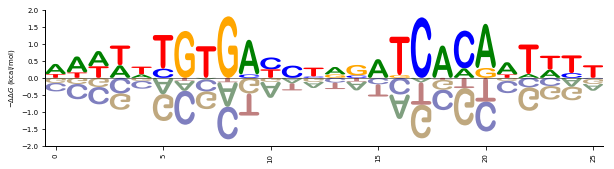

In [133]:
### Style CRP panel
logo = lm.Logo(-crp_df, shade_below=.5, fade_below=.5, font_name='Arial Rounded MT Bold')
               #font_name='Hobo Std')
logo.style_spines(visible=False)
logo.style_spines(spines=['left','bottom'], visible=True)
logo.ax.set_ylabel("$-\Delta\Delta G$ (kcal/mol)")
logo.style_xticks(rotation=90, fmt='%d', anchor=0, spacing=5)
#logo.ax.xaxis.set_ticks_position('none') 
logo.ax.set_ylim([-2,2])

#logo.ax.set_xticks([])

In [6]:
lm.list_font_names()

['.Keyboard',
 '.LastResort',
 '.SF Compact Display',
 '.SF Compact Rounded',
 '.SF Compact Text',
 '.SF NS Display Condensed',
 '.SF NS Rounded',
 '.SF NS Symbols',
 '.SF NS Text Condensed',
 'Adobe Arabic',
 'Adobe Caslon Pro',
 'Adobe Devanagari',
 'Adobe Fan Heiti Std',
 'Adobe Fangsong Std',
 'Adobe Garamond Pro',
 'Adobe Gothic Std',
 'Adobe Hebrew',
 'Adobe Heiti Std',
 'Adobe Kaiti Std',
 'Adobe Ming Std',
 'Adobe Myungjo Std',
 'Adobe Naskh',
 'Adobe Song Std',
 'Andale Mono',
 'Apple Braille',
 'Apple Chancery',
 'Apple Symbols',
 'AppleGothic',
 'AppleMyungjo',
 'Arial',
 'Arial Black',
 'Arial Narrow',
 'Arial Rounded MT Bold',
 'Arial Unicode MS',
 'Ayuthaya',
 'Batang',
 'Big Caslon',
 'Birch Std',
 'Bitstream Vera Sans',
 'Bitstream Vera Sans Mono',
 'Bitstream Vera Serif',
 'Blackoak Std',
 'Bodoni 72 Smallcaps',
 'Bodoni Ornaments',
 'Bookshelf Symbol 7',
 'Bradley Hand',
 'Brush Script MT',
 'Brush Script Std',
 'Calibri',
 'Cambria',
 'Cambria Math',
 'Candara',
 'Ch

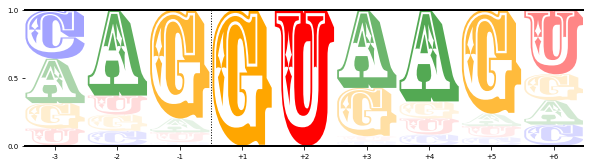

In [69]:
### Style 5'ss panel
logo = lm.Logo(ss_df, 
               fade_probabilities=True,
               font_name='Rosewood Std')
logo.ax.set_xticks(range(len(ss_df)))
logo.ax.set_xticklabels('%+d'%x for x in [-3,-2,-1,1,2,3,4,5,6])
logo.style_spines(spines=['top','bottom'], linewidth=2)
logo.style_spines(spines=['left','right'], visible=False)
logo.ax.set_yticks([0,.5,1])
logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')

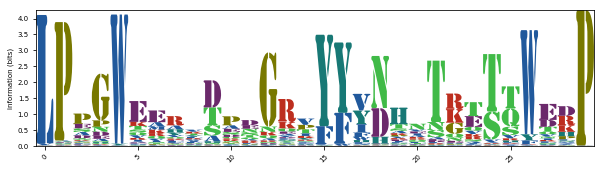

In [78]:
### Style WW panel
logo = lm.Logo(ww_df,
               font_name='Stencil Std',
               color_scheme='NajafabadiEtAl2017')
logo.ax.set_ylabel('information (bits)')
logo.style_xticks(anchor=0, spacing=5, rotation=45)

In [9]:
lm.list_font_names()

['.Keyboard',
 '.LastResort',
 '.SF Compact Display',
 '.SF Compact Rounded',
 '.SF Compact Text',
 '.SF NS Display Condensed',
 '.SF NS Rounded',
 '.SF NS Symbols',
 '.SF NS Text Condensed',
 'Adobe Arabic',
 'Adobe Caslon Pro',
 'Adobe Devanagari',
 'Adobe Fan Heiti Std',
 'Adobe Fangsong Std',
 'Adobe Garamond Pro',
 'Adobe Gothic Std',
 'Adobe Hebrew',
 'Adobe Heiti Std',
 'Adobe Kaiti Std',
 'Adobe Ming Std',
 'Adobe Myungjo Std',
 'Adobe Naskh',
 'Adobe Song Std',
 'Andale Mono',
 'Apple Braille',
 'Apple Chancery',
 'Apple Symbols',
 'AppleGothic',
 'AppleMyungjo',
 'Arial',
 'Arial Black',
 'Arial Narrow',
 'Arial Rounded MT Bold',
 'Arial Unicode MS',
 'Ayuthaya',
 'Batang',
 'Big Caslon',
 'Birch Std',
 'Bitstream Vera Sans',
 'Bitstream Vera Sans Mono',
 'Bitstream Vera Serif',
 'Blackoak Std',
 'Bodoni 72 Smallcaps',
 'Bodoni Ornaments',
 'Bookshelf Symbol 7',
 'Bradley Hand',
 'Brush Script MT',
 'Brush Script Std',
 'Calibri',
 'Cambria',
 'Cambria Math',
 'Candara',
 'Ch

[]

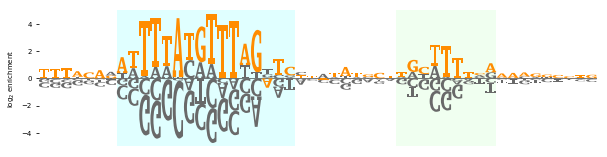

In [161]:
### Style ARS panel
logo = lm.Logo(ars_df, color_scheme='dimgray', 
               font_name='Luxi Mono')
logo.style_glyphs_in_sequence(sequence=ars_consensus_seq, color='darkorange')
logo.style_spines(visible=False)
logo.ax.set_ylim([-5,5])
logo.highlight_position_range(pmin=17, pmax=32, color='lightcyan')
logo.highlight_position_range(pmin=42, pmax=50, color='honeydew')
logo.ax.set_ylabel('$\log_2$ enrichment')
logo.ax.set_xticks([])

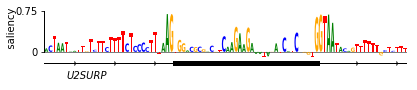

In [11]:
### Style saliency logo

# Get exon bounds
data_df = pd.read_excel('data/Janganathan2018_Fig1D.xlsx')
exon_indices = data_df['exon']
indices = data_df.index
exon_start = min(indices[exon_indices])
exon_stop = max(indices[exon_indices])

# make figure
fig, ax = plt.subplots(figsize=[6.5,1.25])

# draw logo
logo = lm.Logo(saliency_df, ax=ax)
logo.style_spines(visible=False)
logo.style_spines(spines=['left'],visible=True,bounds=[0,.75])
ax.set_yticks([0,.75])
ax.set_yticklabels(['0','0.75'])
ax.set_ylim([-.5,.75])
ax.set_xticks([])
ax.set_ylabel('           saliency', labelpad=-2)

# Draw gene
y = -.2
ax.axhline(y, color='k', linewidth=1)
xs = np.arange(-3,len(saliency_df),10)
ys = y*np.ones(len(xs))
ax.plot(xs,ys,marker='4', linewidth=0, markersize=5, color='k')

# Draw gene name
ax.text(5,-.5,'U2SURP', fontstyle='italic')

# Draw exon
ax.plot([exon_start, exon_stop],[y,y], color='k', linewidth=5)


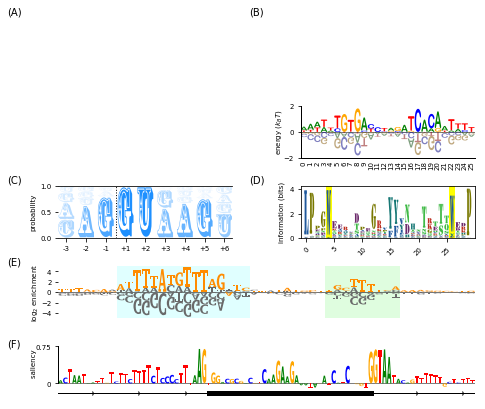

In [174]:
fontsize=7
mpl.rcParams['font.size'] = fontsize
mpl.rcParams['text.usetex'] = False

fig = plt.figure(figsize=(7, 6))
gs = gridspec.GridSpec(nrows=5, ncols=2)

### CRP logo
ax = fig.add_subplot(gs[1, 1])
logo = lm.Logo(-crp_df, 
               ax=ax,
               shade_below=.5, 
               fade_below=.5, 
               font_name='Arial Rounded MT Bold')
               #font_name='Hobo Std')
logo.style_spines(visible=False)
logo.style_spines(spines=['left','bottom'], visible=True)
logo.ax.set_ylabel("energy ($k_B T$)", labelpad=-1)
logo.style_xticks(rotation=90, fmt='%d', anchor=0)
logo.ax.xaxis.set_ticks_position('none') 
logo.ax.set_ylim([-2,2])
logo.ax.xaxis.set_tick_params(pad=-1)

### splice site logo
ax = fig.add_subplot(gs[2, 0])
logo = lm.Logo(ss_df, 
               ax=ax,
               width=.8,
               vpad=.05,
               fade_probabilities=True,
               stack_order='small_on_top',
               color_scheme='dodgerblue',
               font_name='Rosewood Std')
logo.ax.set_xticks(range(len(ss_df)))
logo.ax.set_xticklabels('%+d'%x for x in [-3,-2,-1,1,2,3,4,5,6])
logo.style_spines(spines=['left', 'right'], visible=False)
logo.ax.set_yticks([0,.5,1])
logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
logo.ax.set_ylabel('probability')

### WW logo
ax = fig.add_subplot(gs[2, 1])
logo = lm.Logo(ww_df,
               ax=ax,
               font_name='Stencil Std',
               color_scheme='NajafabadiEtAl2017',
               vpad=.1,
               width=.8)
logo.ax.set_ylabel('information (bits)')
logo.style_xticks(anchor=0, spacing=5, rotation=45)
logo.highlight_position(p=4, color='yellow', alpha=1)
logo.highlight_position(p=26, color='yellow', alpha=1)
logo.ax.set_xlim([-1,len(ww_df)])

### ARS logo
ax = fig.add_subplot(gs[3, :])
logo = lm.Logo(ars_df, ax=ax,
               color_scheme='dimgray', 
               font_name='Luxi Mono')
logo.style_glyphs_in_sequence(sequence=ars_consensus_seq, color='darkorange')
logo.style_spines(visible=False)
logo.ax.set_ylim([-5,5])
logo.ax.set_ylabel('$\log_2$ enrichment', labelpad=0)
logo.ax.set_yticks([-4,-2,0,2,4])
logo.ax.set_xticks([])
logo.highlight_position_range(pmin=17, pmax=32, color='lightcyan')
logo.highlight_position_range(pmin=42, pmax=50, color='palegreen', alpha=.3)


### saliency logo
ax = fig.add_subplot(gs[4, :])
logo = lm.Logo(saliency_df, ax=ax)
logo.style_spines(visible=False)
logo.style_spines(spines=['left'], visible=True, bounds=[0,.75])
ax.set_yticks([0,.75])
ax.set_yticklabels(['0','0.75'])
ax.set_ylim([-.3,.75])
ax.set_xticks([])
ax.set_ylabel('        saliency', labelpad=-1)
y = -.2
ax.axhline(y, color='k', linewidth=1)
xs = np.arange(-3,len(saliency_df),10)
ys = y*np.ones(len(xs))
ax.plot(xs,ys,marker='4', linewidth=0, markersize=5, color='k')
ax.plot([exon_start, exon_stop],[y,y], color='k', linewidth=5)

# tighten layout
plt.tight_layout(h_pad=1, w_pad=6, pad=4)

# Add panel labels
x1=.01
x2=.49

y1=.98
y2=.79
y3=.59
y4=.40
y5=.21

kwargs = {'fontsize':10, 'horizontalalignment':'left', 'verticalalignment':'top'}

plt.figtext(x1, y1,'(A)', **kwargs)
plt.figtext(x2, y1,'(B)', **kwargs)
plt.figtext(x1, y3,'(C)', **kwargs)
plt.figtext(x2, y3,'(D)', **kwargs)
plt.figtext(x1, y4,'(E)', **kwargs)
plt.figtext(x1, y5,'(F)', **kwargs)

# save a pdf
fig.savefig('figure_logos.pdf', transparent=True)

In [138]:
plt.tight_layout?